In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import copy
import os
import glob
from mpl_toolkits.basemap import cm,addcyclic,Basemap, shiftgrid
% matplotlib inline

In [4]:
nc_filename=glob.glob('/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myORCA_offline/EXP00/*_ptrc_T*.nc')
print("found *.nc file: \n{}".format(nc_filename))

found *.nc file: 
['/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myORCA_offline/EXP00/PISCES_1m_00010101_00011231_ptrc_T.nc', '/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myORCA_offline/EXP00/PISCES_1y_00010101_00011231_ptrc_T.nc']


In [5]:
ptrc=nc.Dataset(nc_filename[0])
#print ptrc.variables
lon=ptrc.variables['nav_lon'][:]
lat=ptrc.variables['nav_lat'][:]
TR_7=ptrc.variables['TR_7'][:]/(1e6)
TR_8=ptrc.variables['TR_8'][:]/(1e6)
TR_9=ptrc.variables['TR_9'][:]/(1e6)
#ice=ptrc.variables['ice_cover'][:]
#u=ptrc.variables['uoce'][:]
#v=ptrc.variables['voce'][:]
#w=ptrc.variables['woce'][:]
depth = ptrc.variables['deptht'][:]

In [6]:
TR_7=np.ma.masked_where(TR_7<= 0, TR_7)
TR_8=np.ma.masked_where(TR_8<= 0, TR_8)
TR_9=np.ma.masked_where(TR_9<= 0, TR_9)
TR_7=np.ma.masked_where(np.isnan(TR_7),TR_7)
TR_8=np.ma.masked_where(np.isnan(TR_8),TR_8)
TR_9=np.ma.masked_where(np.isnan(TR_9),TR_9)
#TR_7_ma=np.ma.masked_where(np.iszero(TR_7), TR_7)

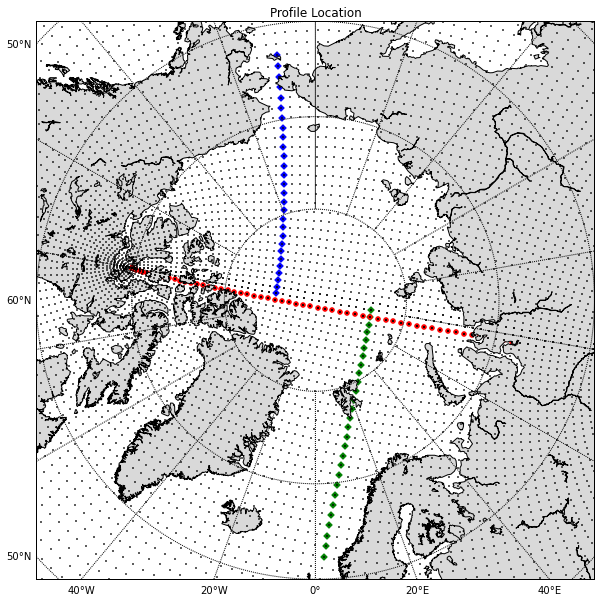

In [8]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)

m = Basemap(projection='npstere',boundinglat=60,lon_0=0,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.85')
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
x, y = m(lon, lat)
ax.plot(x, y, color='black', linestyle='none', marker='s', markersize=1)
#for i in range (45):
m.scatter(x[120:148,55],y[120:148,55],marker='D',color='blue')
m.scatter(x[120:148,140],y[120:148,140],marker='D',color='green')
m.scatter(x[148,0:90],y[148,0:90],color='red')
#m.scatter(x[148,90],y[148,90],color='yellow',s=1000)
ax.set_title('Profile Location')
plt.show()

# Dissovled Pa

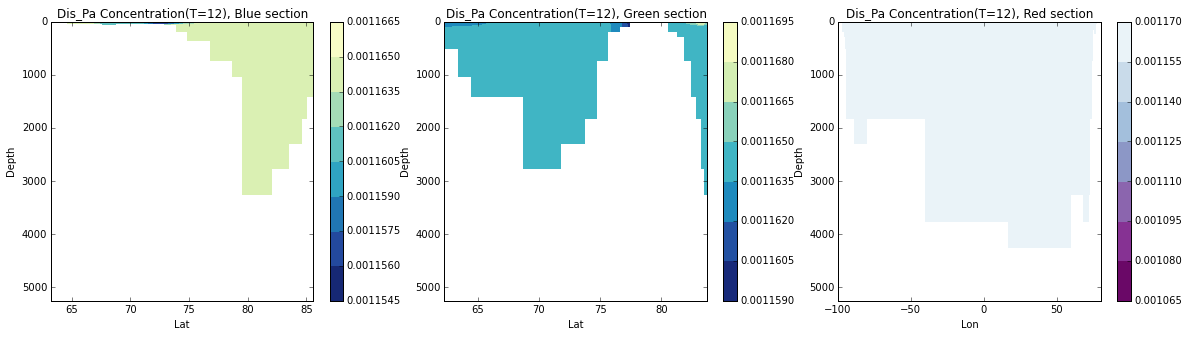

In [13]:
fig = plt.figure(figsize=(20,5))
i=11
ax = fig.add_subplot(131)
plt.contourf(lat[120:148,55], depth,TR_7[i,:,120:148,55], cmap=plt.get_cmap('YlGnBu_r'))
plt.colorbar()
#plt.colorbar.set_clim(20, 120)
plt.title('Dis_Pa Concentration(T=%s), Blue section'%(i+1))
plt.xlabel('Lat')
plt.ylabel('Depth')
plt.gca().invert_yaxis()


ax = fig.add_subplot(132)
plt.contourf(lat[120:148,140], depth, TR_7[i,:,120:148,140], cmap=plt.get_cmap('YlGnBu_r'))
plt.colorbar()
plt.title('Dis_Pa Concentration(T=%s), Green section'%(i+1))
plt.xlabel('Lat')
plt.ylabel('Depth')
plt.gca().invert_yaxis()

ax = fig.add_subplot(133)
plt.contourf(lon[148,0:90], depth, TR_7[i,:,148,0:90], cmap=plt.get_cmap('BuPu_r'))
plt.colorbar()
plt.title('Dis_Pa Concentration(T=%s), Red section'%(i+1))
plt.xlabel('Lon')
plt.ylabel('Depth')
plt.gca().invert_yaxis()
plt.show()

# Pa/Th ratio

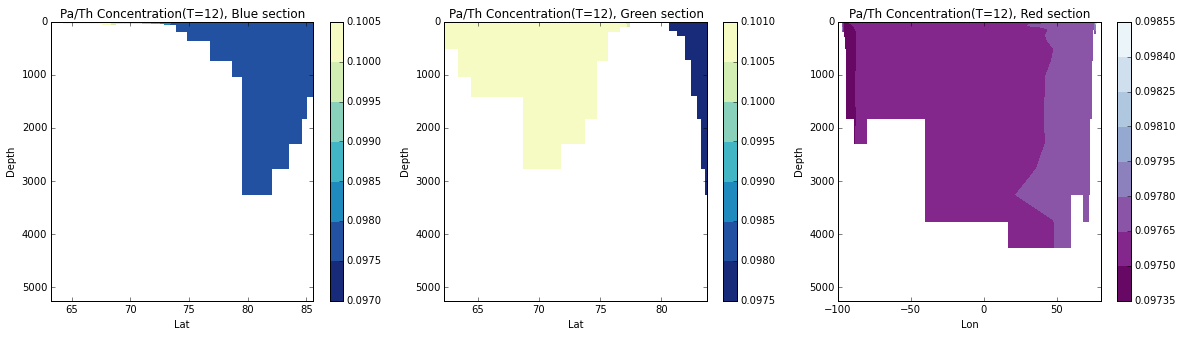

In [16]:
fig = plt.figure(figsize=(20,5))
i=11
ax = fig.add_subplot(131)
plt.contourf(lat[120:148,55], depth,TR_7[i,:,120:148,55]/TR_8[i,:,120:148,55], cmap=plt.get_cmap('YlGnBu_r'))
plt.colorbar()
#plt.colorbar.set_clim(20, 120)
plt.title('Pa/Th Concentration(T=%s), Blue section'%(i+1))
plt.xlabel('Lat')
plt.ylabel('Depth')
plt.gca().invert_yaxis()


ax = fig.add_subplot(132)
plt.contourf(lat[120:148,140], depth, TR_7[i,:,120:148,140]/TR_8[i,:,120:148,140], cmap=plt.get_cmap('YlGnBu_r'))
plt.colorbar()
plt.title('Pa/Th Concentration(T=%s), Green section'%(i+1))
plt.xlabel('Lat')
plt.ylabel('Depth')
plt.gca().invert_yaxis()

ax = fig.add_subplot(133)
plt.contourf(lon[148,0:90], depth, TR_7[i,:,148,0:90]/TR_8[i,:,148,0:90], cmap=plt.get_cmap('BuPu_r'))
plt.colorbar()
plt.title('Pa/Th Concentration(T=%s), Red section'%(i+1))
plt.xlabel('Lon')
plt.ylabel('Depth')
plt.gca().invert_yaxis()
plt.show()

# Particulate Pa

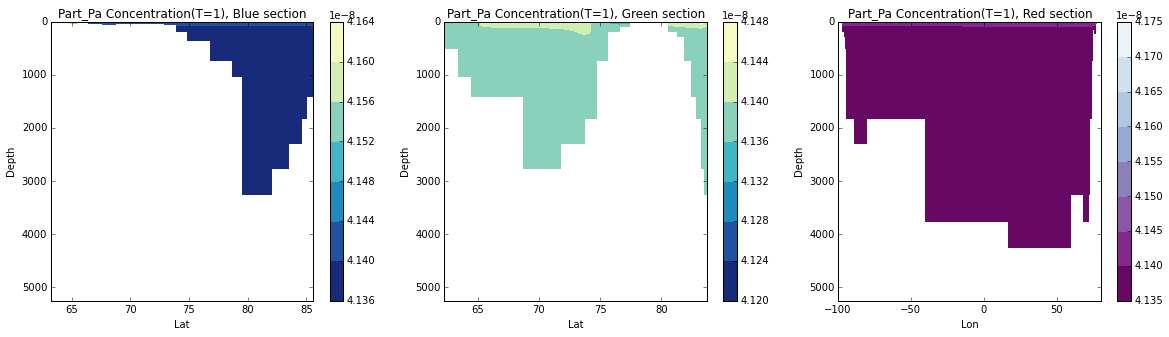

In [17]:
fig = plt.figure(figsize=(20,5))
i=0
ax = fig.add_subplot(131)
plt.contourf(lat[120:148,55], depth,TR_9[i,:,120:148,55], cmap=plt.get_cmap('YlGnBu_r'))
plt.colorbar()
#plt.colorbar.set_clim(20, 120)
plt.title('Part_Pa Concentration(T=%s), Blue section'%(i+1))
plt.xlabel('Lat')
plt.ylabel('Depth')
plt.gca().invert_yaxis()


ax = fig.add_subplot(132)
plt.contourf(lat[120:148,140], depth, TR_9[i,:,120:148,140], cmap=plt.get_cmap('YlGnBu_r'))
plt.colorbar()
plt.title('Part_Pa Concentration(T=%s), Green section'%(i+1))
plt.xlabel('Lat')
plt.ylabel('Depth')
plt.gca().invert_yaxis()

ax = fig.add_subplot(133)
plt.contourf(lon[148,0:90], depth, TR_9[i,:,148,0:90], cmap=plt.get_cmap('BuPu_r'))
plt.colorbar()
plt.title('Part_Pa Concentration(T=%s), Red section'%(i+1))
plt.xlabel('Lon')
plt.ylabel('Depth')
plt.gca().invert_yaxis()
plt.show()

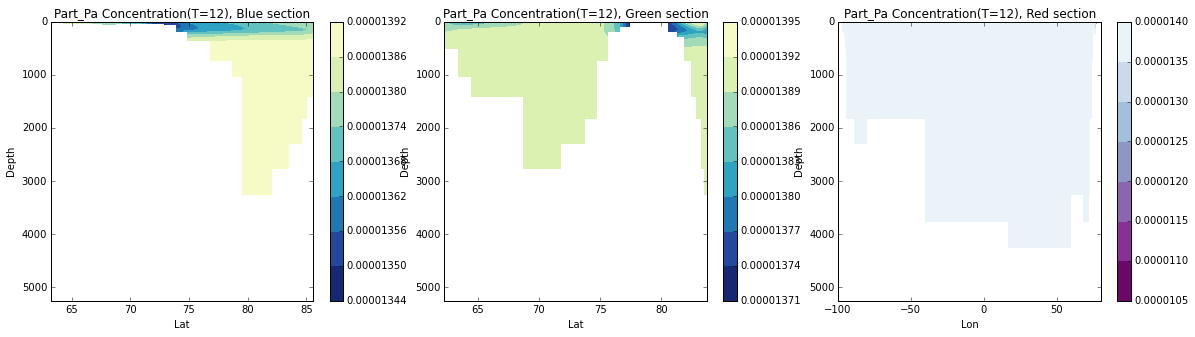

In [18]:
fig = plt.figure(figsize=(20,5))
i=11
ax = fig.add_subplot(131)
plt.contourf(lat[120:148,55], depth,TR_9[i,:,120:148,55], cmap=plt.get_cmap('YlGnBu_r'))
plt.colorbar()
#plt.colorbar.set_clim(20, 120)
plt.title('Part_Pa Concentration(T=%s), Blue section'%(i+1))
plt.xlabel('Lat')
plt.ylabel('Depth')
plt.gca().invert_yaxis()


ax = fig.add_subplot(132)
plt.contourf(lat[120:148,140], depth, TR_9[i,:,120:148,140], cmap=plt.get_cmap('YlGnBu_r'))
plt.colorbar()
plt.title('Part_Pa Concentration(T=%s), Green section'%(i+1))
plt.xlabel('Lat')
plt.ylabel('Depth')
plt.gca().invert_yaxis()

ax = fig.add_subplot(133)
plt.contourf(lon[148,0:90], depth, TR_9[i,:,148,0:90], cmap=plt.get_cmap('BuPu_r'))
plt.colorbar()
plt.title('Part_Pa Concentration(T=%s), Red section'%(i+1))
plt.xlabel('Lon')
plt.ylabel('Depth')
plt.gca().invert_yaxis()
plt.show()